In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5*1024)])

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
def VGG16():
    model = tf.keras.models.Sequential([
        # input = 224 x 224 x 3

        # 224 x 224 x 64
        layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu', input_shape=(224, 224, 3)),
        layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'),

        # 112 x 112 x 64
        layers.MaxPool2D((2, 2), padding='same'),

        # 112 x 112 x 128
        layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'),
        layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'),

        # 56 x 56 x 128
        layers.MaxPool2D((2, 2), padding='same'),

        # 56 x 56 x 256
        layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'),

        # 28 x 28 x 256
        layers.MaxPool2D((2, 2), padding='same'),

        # 28 x 28 x 512
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),

        # 14 x 14 x 512
        layers.MaxPool2D((2, 2), padding='same'),

          # 14 x 14 x 512
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),
        layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),

        # 7 x 7 x 512
        layers.MaxPool2D((2, 2), padding='same'),

        # 1 x 1 x 25088
        layers.Flatten(),
        layers.Dropout(0.5),

        # 1 x 1 x 4096
        layers.Dense(4096, activation='relu'),

        # 1 x 1 x 4096
        layers.Dense(4096, activation='relu'),

        # 1 x 1 x 1000
        layers.Dense(1000, activation='relu'),

        # 1 x 1 x 2
        layers.Dense(2, activation='softmax'),
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                  loss='categorical_crossentropy',
                  metrics=['acc'])

    return model


In [ ]:
dataset_path ='/content/drive/MyDrive/Colab Notebooks/AID'
train_dataset_path = 'AID/train'
valid_dataset_path = 'AID/valid'

In [ ]:
# train, valid 분리
cate = os.listdir('/content/drive/MyDrive/Colab Notebooks/AID')
print(cate)

for i in cate:
    tmp = os.listdir(f'/content/drive/MyDrive/Colab Notebooks/AID/{i}')
    os.makedirs(f'AID/train/{i}')
    os.makedirs(f'AID/valid/{i}')
    for j in tmp[:50]:
        shutil.copyfile(f'/content/drive/MyDrive/Colab Notebooks/AID/{i}/{j}', f'AID/valid/{i}/{j}')
    for j in tmp[50:]:
        shutil.copyfile(f'/content/drive/MyDrive/Colab Notebooks/AID/{i}/{j}', f'AID/train/{i}/{j}')

['Industrial', 'StorageTanks']


In [ ]:
# Dataset (storage tank & others)
train_data_generator = ImageDataGenerator(rescale=1. / 255)
train_dataset = train_data_generator.flow_from_directory(train_dataset_path,
                                                         shuffle=True,
                                                         target_size=(224, 224),
                                                         batch_size=32,
                                                         class_mode='categorical')


valid_data_generator = ImageDataGenerator(rescale=1. / 255)
valid_dataset = valid_data_generator.flow_from_directory(valid_dataset_path,
                                                         shuffle=True,
                                                         target_size=(224, 224),
                                                         batch_size=32,
                                                         class_mode='categorical')

Found 650 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
model = VGG16()

checkpoint_filepath = "logs/VGG"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_filepath,
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
)


train = model.fit(train_dataset, epochs=100, validation_data=valid_dataset,
                  callbacks=[
                        checkpoint_callback,
                        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
                    ],)

Epoch 1/100
21/21 [==============================] - 43s 1s/step - loss: 0.6929 - acc: 0.5231 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/100
21/21 [==============================] - 12s 566ms/step - loss: 0.6926 - acc: 0.5231 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/100
21/21 [==============================] - 13s 595ms/step - loss: 0.6922 - acc: 0.5231 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/100
21/21 [==============================] - 13s 608ms/step - loss: 0.6921 - acc: 0.5231 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 5/100
21/21 [==============================] - 12s 546ms/step - loss: 0.6919 - acc: 0.5231 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 6/100
21/21 [==============================] - 13s 591ms/step - loss: 0.6918 - acc: 0.5231 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 7/100
21/21 [==============================] - 13s 599ms/step - loss: 0.6918 - acc: 0.5231 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 8/100
21/21 [==============================] - 13s 622ms/st

Saved Accuracy graph
Saved Loss graph


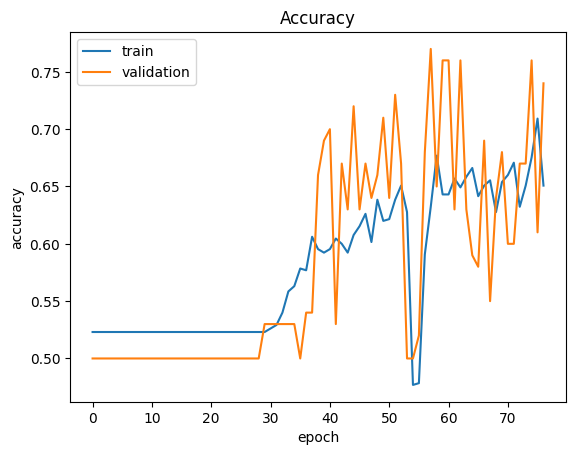

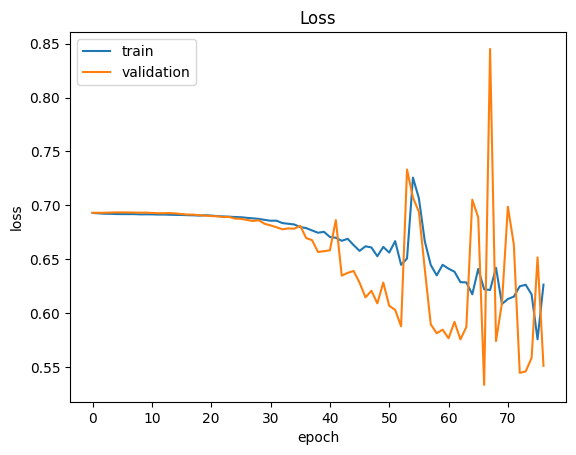

In [ ]:
# Accuracy graph
plt.figure(1)
plt.plot(train.history['acc'])
plt.plot(train.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('VGG16_Accuracy_1.png')
print("Saved Accuracy graph")

# Loss graph
plt.figure(2)
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('VGG16_Loss_1.png')
print("Saved Loss graph")

plt.show()

In [17]:
model = VGG16()

model.load_weights(checkpoint_filepath)

In [18]:
loss, acc = tmp.evaluate(valid_dataset)


4/4 [==============================] - 2s 386ms/step - loss: 0.5333 - acc: 0.6900


In [19]:
model.save('VGG16.h5')

In [20]:
# test set 생성

test_data_generator = ImageDataGenerator(rescale=1. / 255)
test_dataset = test_data_generator.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/AID',
                                                         shuffle=True,
                                                         target_size=(224, 224),
                                                         batch_size=32,
                                                         class_mode='categorical')

Found 750 images belonging to 2 classes.


In [21]:
a = model.predict(test_dataset)

24/24 [==============================] - 13s 544ms/step
